# 1. Bag Of Words(BOW)

##**What is a Bag-of-Words?**
A bag-of-words model, or BoW for short, is a way of extracting features from text for use in modeling, such as with machine learning algorithms.

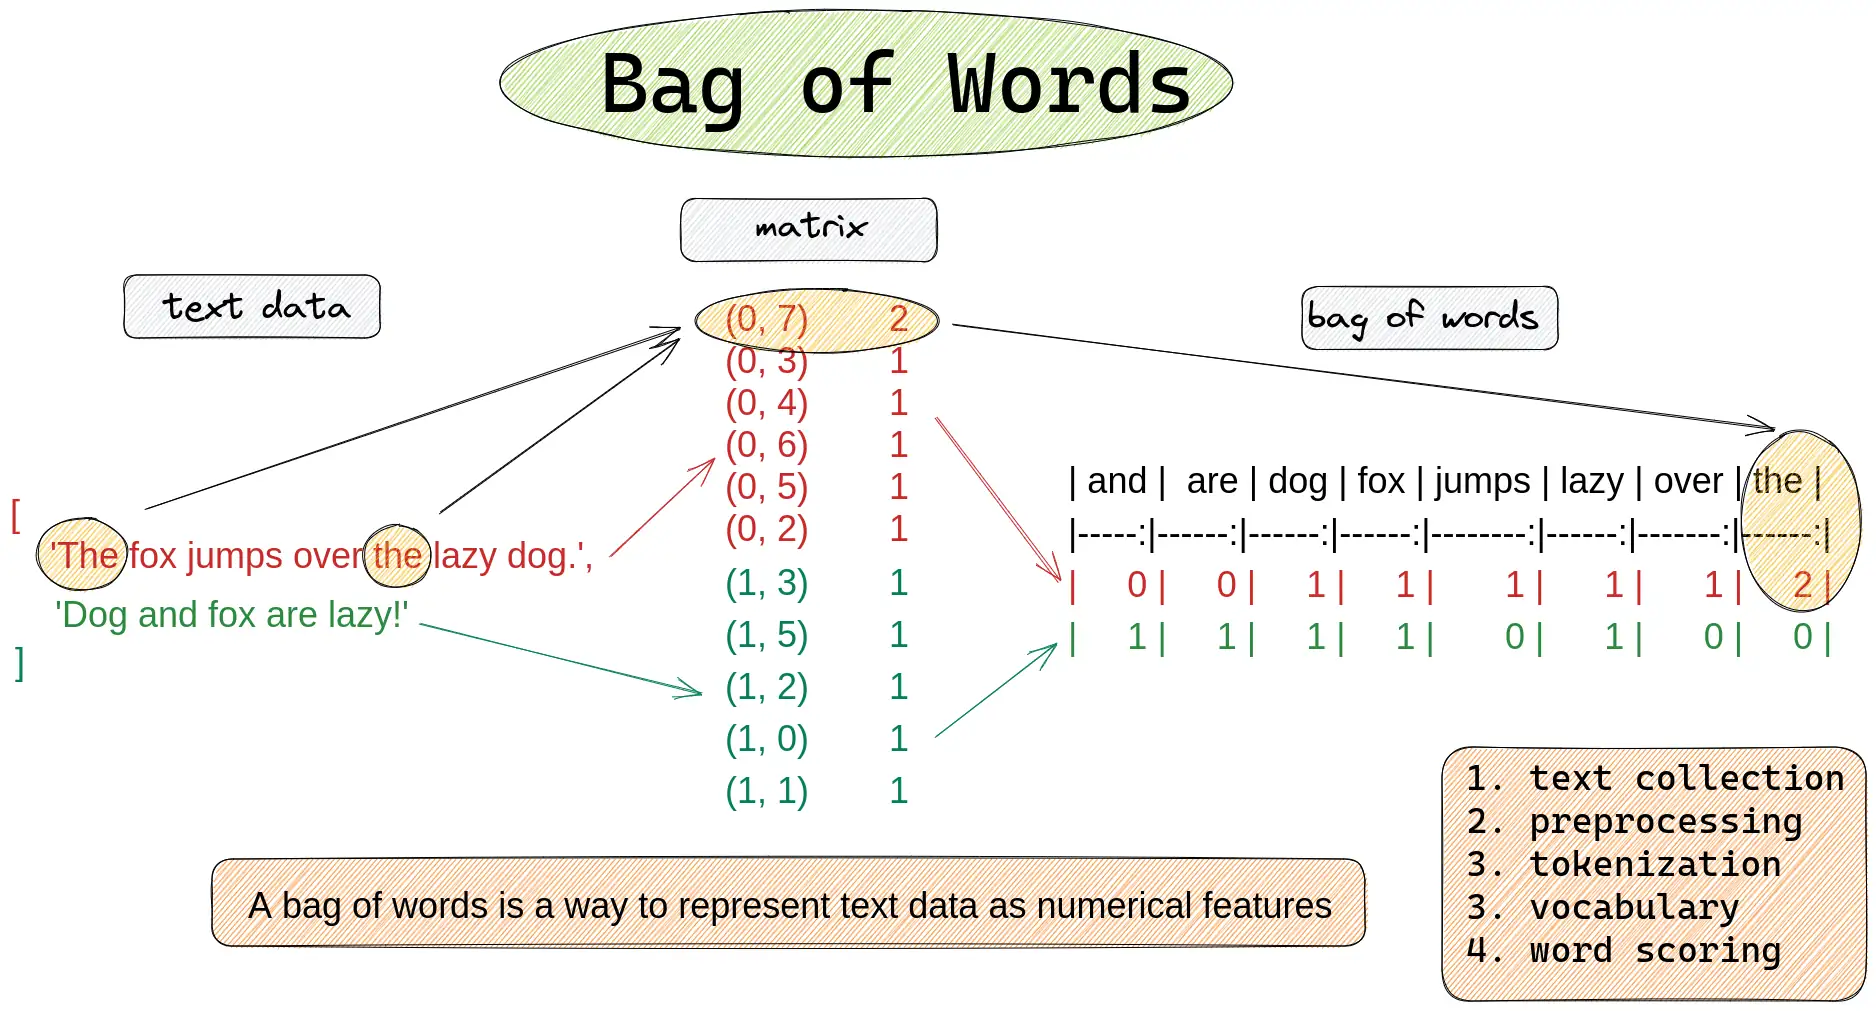

The approach is very simple and flexible, and can be used in a myriad of ways for extracting features from documents.

A bag-of-words is a representation of text that describes the occurrence of words within a document.

**It involves two things:**

1. A vocabulary of known words.
2. A measure of the presence of known words.

It is called a “bag” of words, because any information about the order or structure of words in the document is discarded. The model is only concerned with whether known words occur in the document, not where in the document.

## **Example of the Bag-of-Words Model**
Let’s make the bag-of-words model concrete with a worked example.

**Step 1: Collect Data**

Below is a snippet of the first few lines of text from the book “A Tale of Two Cities” by Charles Dickens, taken from Project Gutenberg.

* It was the best of times,
* it was the worst of times,
* it was the age of wisdom,
* it was the age of foolishness,

For this small example, let’s treat each line as a separate “document” and the 4 lines as our entire corpus of documents.

**Step 2: Design the Vocabulary**

Now we can make a list of all of the words in our model vocabulary.

The unique words here (ignoring case and punctuation) are:

* “it”
* “was”
* “the”
* “best”
* “of”
* “times”
* “worst”
* “age”
* “wisdom”
* “foolishness”

That is a vocabulary of 10 words from a corpus containing 24 words.

**Step 3: Create Document Vectors**

The next step is to score the words in each document.

The objective is to turn each document of free text into a vector that we can use as input or output for a machine learning model.

Because we know the vocabulary has 10 words, we can use a fixed-length document representation of 10, with one position in the vector to score each word.

The simplest scoring method is to mark the presence of words as a boolean value, 0 for absent, 1 for present.

Using the arbitrary ordering of words listed above in our vocabulary, we can step through the first document (“It was the best of times“) and convert it into a binary vector.

The scoring of the document would look as follows:

* “it” = 1
* “was” = 1
* “the” = 1
* “best” = 1
* “of” = 1
* “times” = 1
* “worst” = 0
* “age” = 0
* “wisdom” = 0
* “foolishness” = 0

As a binary vector, this would look as follows:

[1, 1, 1, 1, 1, 1, 0, 0, 0, 0]

The other three documents would look as follows:

"it was the worst of times" = [1, 1, 1, 0, 1, 1, 1, 0, 0, 0]

"it was the age of wisdom" = [1, 1, 1, 0, 1, 0, 0, 1, 1, 0]

"it was the age of foolishness" = [1, 1, 1, 0, 1, 0, 0, 1, 0, 1]

All ordering of the words is nominally discarded and we have a consistent way of extracting features from any document in our corpus, ready for use in modeling.

New documents that overlap with the vocabulary of known words, but may contain words outside of the vocabulary, can still be encoded, where only the occurrence of known words are scored and unknown words are ignored.

You can see how this might naturally scale to large vocabularies and larger documents.

# Implementation

In [1]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
sentence = """It was the best of times,it was the worst of times,it was the age of wisdom,it was the age of foolishness,"""

## BOW conversion

In [3]:
countVector = CountVectorizer(stop_words="english")

In [4]:
cv = countVector.fit_transform([sentence]).toarray()

In [5]:
cv

array([[2, 1, 1, 2, 1, 1]])

In [6]:
countVector.get_feature_names_out()

array(['age', 'best', 'foolishness', 'times', 'wisdom', 'worst'],
      dtype=object)

In [7]:
array = cv[0]

## Binary bow

In [8]:
countVector = CountVectorizer(stop_words='english',binary=True)

In [9]:
cv = countVector.fit_transform([sentence]).toarray()

In [10]:
cv

array([[1, 1, 1, 1, 1, 1]])

In [11]:
countVector.get_feature_names_out()

array(['age', 'best', 'foolishness', 'times', 'wisdom', 'worst'],
      dtype=object)

# 2. TF-IDF

TF(Term Frequency)

IDF(Inverse Document Frequency)

**TF-IDF**,

 short for **Term Frequency–Inverse Document Frequency**, is a numerical statistic that is intended to reflect how important a word is to a document, in a collection or Corpus(Paragraph).

 It is often used as a Weighing Factor in searches of information retrieval, Text Mining, and User Modelling. The TF-IDF value increases proportionally to the number of times a word appears in the document and is offset by the number of documents in the corpus that contain the word, which helps to adjust for the fact that some words appear more frequently in general.

TF-IDF is much more preferred than Bag-Of-Words, in which every word, is represented as 1 or 0, every time it gets appeared in each Sentence, while, in TF-IDF, gives weightage to each Word separately, which in turn defines the importance of each word than others.

Lets Understand these Terms separately as,

* TF: Term Frequency,

 which measures how frequently a term occurs in a document. Since every document is different in length, it is possible that a term would appear much more times in long documents than shorter ones. Thus, the term frequency is often divided by the document length (aka. the total number of terms in the document) as a way of normalization:

**TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document),**


* IDF:

Inverse Document Frequency, which measures how important a term is. While computing TF, all terms are considered equally important. However it is known that certain terms, such as “is”, “of”, and “that”, may appear a lot of times but have little importance. Thus we need to weigh down the frequent terms while scale up the rare ones, by computing the following:

**IDF(t) = log_e(Total number of documents / Number of documents with term t in it)**.

**Let’s Consider these Three sentences:**

1. He is a Good Boy
2. She is a Good Girl, and,

3. Both are Good Boy, and Girl, respectively.

So, after using Regular Expression, stop-words and other Functions from NLTK library, we get purified version of these three sentences, which can be shown as,

1. Good Boy
2. Good Girl, and

3.Good Boy Girl, respectively.

Now, Lets Consider TF(Term Frequency) operations,

Let’s assume a word “Good”, in sentence 1, as we know,

**TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document).**

So, Number of times the word “Good” appears in Sentence 1 is, 1 Time, and the Total number of times the word “Good”, appears in all three Sentences is 3 times, so the TF(Term Frequency) value of word “Good” is, TF(“Good”)=1/3=0.333.

Now, lets consider the value of each word, with reference to each sentence, in a tabular format, which can be shown as,
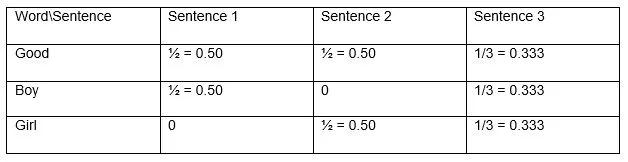

So, we can see TF value of each Word with respect to each Sentence.

Now,

Lets Consider Second of TF-IDF, That is, IDF(Inverse Document Frequency) of Each word, with respect to each Sentence.

As we know,

**IDF(t) = log_e(Total number of documents / Number of documents with term t in it).**

Again, lets consider, the word “Good”, in Sentence 1,Now, we know that Total Number of Sentences we have is 3(Total number of documents), also , We know the word ” Good” appears overall 3 times, considering all 3 sentences, so, Number of documents with term “Good” in it=3,

So, IDF (Inverse Document Frequency) Value of word “Good” would be “ Log(3/3)”, Now, lets consider the IDF( Inverse Document Frequency ) Value of each word, in a Tabular For,

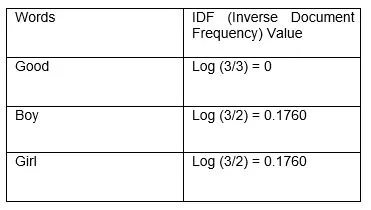

Now, We have Values for both, TF( Term Frequency ) as well as IDF( Inverse Document Frequency ) for each word, for each Sentence we have,

So, Finally the TF-IDF Value for each word would be= TF(Value)*IDF(Value).

Let’s Present TF-IDF Value of each word in a tabular form given below,

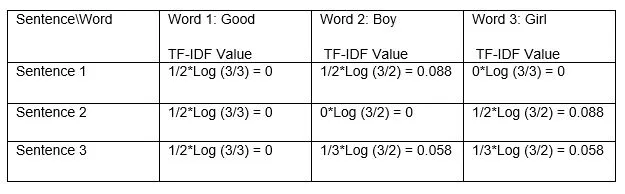


So,

As a Conclusion, we can see that, the word “Good”, appears in each of these 3 sentences, as a result the Value of the word “Good” is Zero, while the Word “Boy” appears only 2 times, in each of these 3 sentences, As a results, we can see, in Sentence 1, the Value(Importance) of word “Boy” is more than the Word “Good”.

As a result, we can see that, TF-IDF, gives Specific Value or Importance to each Word, in any paragraph, The terms with higher weight scores are considered to be more importance, as a result TF-IDF has replaced the concept of “Bag-Of-Words” which gives the Same Value to each word, when occurred in any sentence of Paragraph, which is Major Disadvantage of Bag-Of-Words.



## Implementation

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [13]:
document = """It was the best of times,it was the worst of times,it was the age of wisdom,it was the age of foolishness,"""

In [14]:
tfdf = TfidfVectorizer()

In [15]:
vector = tfdf.fit_transform([document]).toarray()

In [16]:
tfdf.vocabulary_

{'it': 3,
 'was': 7,
 'the': 5,
 'best': 1,
 'of': 4,
 'times': 6,
 'worst': 9,
 'age': 0,
 'wisdom': 8,
 'foolishness': 2}

In [17]:
vector

array([[0.22941573, 0.11470787, 0.11470787, 0.45883147, 0.45883147,
        0.45883147, 0.22941573, 0.45883147, 0.11470787, 0.11470787]])

In [18]:
tfdf.get_feature_names_out()

array(['age', 'best', 'foolishness', 'it', 'of', 'the', 'times', 'was',
       'wisdom', 'worst'], dtype=object)